#### 需求：股票分析
- 使用tushare包获取股票数据
- 输出该股票所有收盘比开盘上涨3%以上的日期
- 输出该股票所有开盘比前日收盘跌幅超过2%的日期

In [1]:
import tushare as ts
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
pro = ts.pro_api()
df = pro.daily(ts_code='600519.SH', start_date='20000101')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20250702,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,600519.SH,20250701,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,600519.SH,20250630,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,600519.SH,20250627,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,600519.SH,20250626,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982
...,...,...,...,...,...,...,...,...,...,...,...
5705,600519.SH,20010831,37.15,37.62,36.80,37.01,37.10,-0.09,-0.2400,23231.48,86231.237
5706,600519.SH,20010830,36.28,37.51,36.00,37.10,36.38,0.72,1.9800,48013.06,177558.558
5707,600519.SH,20010829,36.98,37.00,36.10,36.38,36.86,-0.48,-1.3000,53252.75,194689.620
5708,600519.SH,20010828,34.99,37.00,34.61,36.86,35.55,1.31,3.6900,129647.79,463463.143


In [3]:
df.to_csv('./茅台.csv', index=False)

In [4]:
df = pd.read_csv('./茅台.csv')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20250702,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,600519.SH,20250701,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,600519.SH,20250630,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,600519.SH,20250627,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,600519.SH,20250626,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982


In [5]:
df.drop(labels='ts_code', axis=1, inplace=True)

In [6]:
df.head()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,20250702,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,20250701,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,20250630,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,20250627,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,20250626,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trade_date  5710 non-null   int64  
 1   open        5710 non-null   float64
 2   high        5710 non-null   float64
 3   low         5710 non-null   float64
 4   close       5710 non-null   float64
 5   pre_close   5710 non-null   float64
 6   change      5710 non-null   float64
 7   pct_chg     5710 non-null   float64
 8   vol         5710 non-null   float64
 9   amount      5710 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 446.2 KB


In [8]:
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  5710 non-null   datetime64[ns]
 1   open        5710 non-null   float64       
 2   high        5710 non-null   float64       
 3   low         5710 non-null   float64       
 4   close       5710 non-null   float64       
 5   pre_close   5710 non-null   float64       
 6   change      5710 non-null   float64       
 7   pct_chg     5710 non-null   float64       
 8   vol         5710 non-null   float64       
 9   amount      5710 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 446.2 KB


In [10]:
df.head()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2025-07-02,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,2025-07-01,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,2025-06-30,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,2025-06-27,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,2025-06-26,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982


In [11]:
df.set_index('trade_date', inplace=True)

In [12]:
df.head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2025-07-02,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
2025-07-01,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2025-06-30,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
2025-06-27,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
2025-06-26,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982


In [13]:
maxk = (df['open'] - df['close']) / df['open'] > 0.03
date_mask = (df.index >= '2000-01-01') & (df.index <= '2020-05-31')
df_filtered = df[maxk & date_mask]
df_filtered

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2020-03-18,1040.00,1060.00,1007.99,1007.99,1045.10,-37.11,-3.5509,73459.88,7.582763e+06
2020-03-16,1103.98,1107.95,1062.00,1067.00,1112.03,-45.03,-4.0494,51232.54,5.548947e+06
2020-01-03,1117.00,1117.00,1076.90,1078.56,1130.00,-51.44,-4.5522,130318.78,1.426638e+07
2019-11-29,1165.50,1165.50,1112.89,1129.00,1175.80,-46.80,-3.9803,82397.32,9.338327e+06
2019-09-11,1119.22,1119.97,1068.00,1069.52,1123.85,-54.33,-4.8343,81716.54,8.904691e+06
...,...,...,...,...,...,...,...,...,...
2002-01-04,38.72,38.80,37.45,37.55,38.55,-1.00,-2.5900,29109.62,1.110303e+05
2001-12-20,35.90,35.90,34.65,34.76,35.96,-1.20,-3.3400,11362.23,3.998883e+04
2001-11-16,36.20,36.20,33.99,34.09,33.68,0.41,1.2200,9954.70,3.460036e+04


In [14]:
#df['open'] - df['close']) / df['open'] > 0.03
df.loc[(df['open'] - df['close']) / df['open'] > 0.03]
df.loc[(df['open'] - df['close']) / df['open'] > 0.03].index

DatetimeIndex(['2024-11-08', '2024-10-09', '2024-10-08', '2024-09-12',
               '2024-01-17', '2023-11-01', '2023-10-19', '2023-08-28',
               '2023-04-12', '2022-10-27',
               ...
               '2003-01-02', '2002-11-08', '2002-04-17', '2002-01-28',
               '2002-01-17', '2002-01-04', '2001-12-20', '2001-11-16',
               '2001-11-07', '2001-10-10'],
              dtype='datetime64[ns]', name='trade_date', length=202, freq=None)

In [15]:
df.loc[(df['open'] - df['close'].shift(1)) / df['close'] < -0.02].index

DatetimeIndex(['2025-05-14', '2025-05-08', '2025-03-14', '2025-03-13',
               '2025-03-06', '2025-03-05', '2025-02-27', '2025-02-26',
               '2025-02-13', '2025-02-12',
               ...
               '2001-12-03', '2001-11-30', '2001-11-19', '2001-11-08',
               '2001-10-22', '2001-09-27', '2001-09-18', '2001-09-10',
               '2001-08-28', '2001-08-27'],
              dtype='datetime64[ns]', name='trade_date', length=1225, freq=None)

In [16]:
print(df.index.is_monotonic_increasing)
df = df.sort_index()
new_df = df['2010-01':'2020-02']
new_df


False


,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2010-01-04,172.00,172.00,169.31,169.94,169.82,0.12,0.0700,44304.88,753405.635
2010-01-05,170.99,171.50,169.00,169.44,169.94,-0.50,-0.2900,31513.18,535720.422
2010-01-06,168.99,169.50,166.31,166.76,169.44,-2.68,-1.5800,39889.03,666073.283
2010-01-07,166.76,167.19,161.88,163.72,166.76,-3.04,-1.8200,48825.55,801445.269
2010-01-08,164.00,164.00,160.10,162.00,163.72,-1.72,-1.0500,36702.09,593162.176
...,...,...,...,...,...,...,...,...,...
2020-02-24,1105.50,1110.00,1085.50,1087.18,1112.88,-25.70,-2.3093,38650.36,4221857.466
2020-02-25,1078.00,1082.09,1067.88,1074.81,1087.18,-12.37,-1.1378,38385.62,4127432.130
2020-02-26,1062.00,1084.00,1055.00,1073.70,1074.81,-1.11,-0.1033,43560.97,4663278.433


In [17]:
new_df.head(2)

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2010-01-04,172.00,172.0,169.31,169.94,169.82,0.12,0.07,44304.88,753405.635
2010-01-05,170.99,171.5,169.00,169.44,169.94,-0.50,-0.29,31513.18,535720.422


In [18]:
df_monthly = new_df.resample('ME').first() # 每月第一个交易日对应的行数据
df_monthly

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2010-01-31,172.00,172.00,169.31,169.94,169.82,0.12,0.0700,44304.88,7.534056e+05
2010-02-28,168.88,169.58,167.01,168.89,168.54,0.35,0.2100,29655.94,4.998670e+05
2010-03-31,166.45,167.45,165.99,166.24,166.84,-0.60,-0.3600,21734.74,3.615503e+05
2010-04-30,158.78,160.50,158.76,160.06,158.76,1.30,0.8200,23980.83,3.832288e+05
2010-05-31,127.99,129.56,126.89,128.64,129.03,-0.39,-0.3000,23975.16,3.085046e+05
...,...,...,...,...,...,...,...,...,...
2019-10-31,1153.00,1180.00,1152.01,1167.10,1150.00,17.10,1.4870,31045.27,3.631091e+06
2019-11-30,1181.00,1191.95,1172.50,1185.00,1180.01,4.99,0.4229,22811.96,2.697638e+06
2019-12-31,1118.20,1140.02,1118.20,1133.00,1129.00,4.00,0.3543,30784.41,3.479717e+06


In [19]:
cost = df_monthly['open'].sum() * 100
cost

4373739.0

In [20]:
df_yearly = new_df.resample('YE').last()[: -1]
df_yearly

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2010-12-31,181.80,184.28,181.05,183.92,181.93,1.99,1.0900,46084.87,843075.733
2011-12-31,192.70,194.88,190.00,193.30,192.21,1.09,0.5700,29460.86,569875.567
2012-12-31,213.31,214.80,206.35,209.02,212.30,-3.28,-1.5500,51914.83,1085776.117
2013-12-31,124.00,129.31,122.50,128.38,124.46,3.92,3.1500,57546.49,730676.611
2014-12-31,185.60,190.00,185.00,189.62,186.84,2.78,1.4900,46269.36,871581.692
2015-12-31,218.22,219.50,217.82,218.19,218.86,-0.67,-0.3100,19673.87,429872.169
2016-12-31,326.61,335.29,326.61,334.15,327.31,6.84,2.0900,34687.67,1152982.239
2017-12-31,718.00,726.50,691.60,697.49,718.69,-21.20,-2.9500,76038.87,5372514.665
2018-12-31,563.30,596.40,560.00,590.01,563.00,27.01,4.7975,63678.37,3705150.490


In [21]:
resv = df_yearly['open'].sum() * 1200
resv

4687848.0

In [22]:
last_money = new_df['close'][-1] * 200
last_money

C:\Users\15514\AppData\Local\Temp\ipykernel_12720\2885168518.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_money = new_df['close'][-1] * 200


211400.0

In [23]:
resv + last_money - cost

525509.0

In [24]:
df = pd.read_csv('./茅台.csv').drop(labels='ts_code', axis=1)
df

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,20250702,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,20250701,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,20250630,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,20250627,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,20250626,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982
...,...,...,...,...,...,...,...,...,...,...
5705,20010831,37.15,37.62,36.80,37.01,37.10,-0.09,-0.2400,23231.48,86231.237
5706,20010830,36.28,37.51,36.00,37.10,36.38,0.72,1.9800,48013.06,177558.558
5707,20010829,36.98,37.00,36.10,36.38,36.86,-0.48,-1.3000,53252.75,194689.620
5708,20010828,34.99,37.00,34.61,36.86,35.55,1.31,3.6900,129647.79,463463.143


In [25]:
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')
df

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,2025-07-02,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
1,2025-07-01,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2,2025-06-30,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
3,2025-06-27,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
4,2025-06-26,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982
...,...,...,...,...,...,...,...,...,...,...
5705,2001-08-31,37.15,37.62,36.80,37.01,37.10,-0.09,-0.2400,23231.48,86231.237
5706,2001-08-30,36.28,37.51,36.00,37.10,36.38,0.72,1.9800,48013.06,177558.558
5707,2001-08-29,36.98,37.00,36.10,36.38,36.86,-0.48,-1.3000,53252.75,194689.620
5708,2001-08-28,34.99,37.00,34.61,36.86,35.55,1.31,3.6900,129647.79,463463.143


In [26]:
df.set_index('trade_date', inplace=True)

In [27]:
df.head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2025-07-02,1409.50,1414.80,1400.00,1409.60,1405.10,4.50,0.3203,26218.25,3689246.316
2025-07-01,1409.00,1411.94,1403.31,1405.10,1409.52,-4.42,-0.3136,19878.19,2794423.203
2025-06-30,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
2025-06-27,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
2025-06-26,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982


In [28]:
df = df.sort_index(ascending=True)
df.head()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2001-08-27,34.51,37.78,32.85,35.55,31.39,4.16,13.25,406318.00,1410347.179
2001-08-28,34.99,37.00,34.61,36.86,35.55,1.31,3.69,129647.79,463463.143
2001-08-29,36.98,37.00,36.10,36.38,36.86,-0.48,-1.30,53252.75,194689.620
2001-08-30,36.28,37.51,36.00,37.10,36.38,0.72,1.98,48013.06,177558.558
2001-08-31,37.15,37.62,36.80,37.01,37.10,-0.09,-0.24,23231.48,86231.237


In [29]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()
ma30

trade_date
2001-08-27            NaN
2001-08-28            NaN
2001-08-29            NaN
2001-08-30            NaN
2001-08-31            NaN
                 ...     
2025-06-26    1501.550667
2025-06-27    1493.920000
2025-06-30    1487.099667
2025-07-01    1481.303667
2025-07-02    1475.423667
Name: close, Length: 5710, dtype: float64

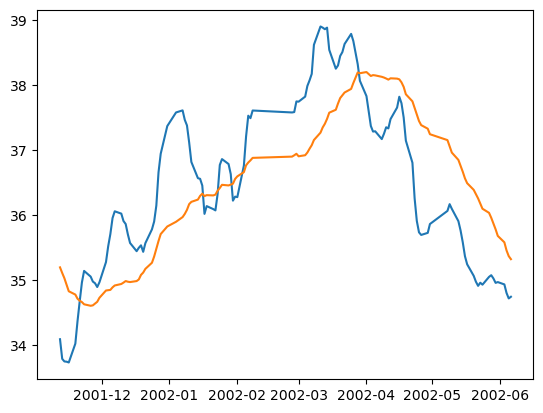

In [30]:
import matplotlib.pyplot as plt
plt.plot(ma5[50: 180])
plt.plot(ma30[50: 180])

In [31]:
ma5 = ma5[30: ]
ma30 = ma30[30: ]

In [32]:
ma30

trade_date
2001-10-15      36.454667
2001-10-16      36.386000
2001-10-17      36.313333
2001-10-18      36.211333
2001-10-19      36.094333
                 ...     
2025-06-26    1501.550667
2025-06-27    1493.920000
2025-06-30    1487.099667
2025-07-01    1481.303667
2025-07-02    1475.423667
Name: close, Length: 5680, dtype: float64

In [33]:
s1 = ma5 < ma30
s2 = ma5 > ma30

In [34]:
df = df[30: ]

In [35]:
death_ex = s1 & s2.shift(1)
df.loc[death_ex]
death_data = df.loc[death_ex].index

In [36]:
golden_ex = ~(s1 | s2.shift(1))
golden_data = df.loc[golden_ex].index

In [37]:
s1 = Series(data=1, index=golden_data)
s2 = Series(data=0, index=death_data)

s = pd.concat([s1, s2])
s = s.sort_index()

In [38]:
s = s['2010': '2020']
s

trade_date
2010-01-20    1
2010-01-22    0
2010-02-03    1
2010-02-26    0
2010-06-04    1
             ..
2020-08-19    1
2020-09-21    0
2020-10-14    1
2020-10-27    0
2020-11-05    1
Length: 119, dtype: int64

In [39]:
first_money = 100000 # 本金
money = first_money # 可变的，买股票花的钱和卖股票收入的钱都从该变量中进行操作
hold = 0 # 持有股票的数量（股数：100股 = 1手）

for i in range(0, len(s)):
    if s.iloc[i] == 1:
        time = s.index[i]
        p = df.loc[time]['open']
        hand_count = money // (p * 100)
        hold = hand_count * 100
        money -= (hold * p)
    else:
        time = s.index[i]
        p = df.loc[time]['open']
        money += p * hold
        hold = 0
last_money = hold * df['close'].iloc[-1]

print(money + last_money - 100000)

851953.0


In [40]:
df

,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,
2001-10-15,35.90,36.00,34.90,35.30,36.00,-0.70,-1.9400,9755.31,34501.714
2001-10-16,35.13,35.80,34.75,34.80,35.30,-0.50,-1.4200,8319.91,29068.173
2001-10-17,34.79,34.81,33.90,34.20,34.80,-0.60,-1.7200,12507.68,42766.283
2001-10-18,34.20,34.66,33.91,34.04,34.20,-0.16,-0.4700,4983.46,16999.063
2001-10-19,34.00,34.15,33.01,33.50,34.04,-0.54,-1.5900,15687.54,52422.843
...,...,...,...,...,...,...,...,...,...
2025-06-26,1415.00,1428.00,1410.08,1420.00,1408.26,11.74,0.8337,34860.25,4955829.982
2025-06-27,1420.01,1423.00,1403.09,1403.09,1420.00,-16.91,-1.1908,38249.73,5404312.675
2025-06-30,1403.50,1413.23,1402.00,1409.52,1403.09,6.43,0.4583,30457.30,4287373.691
